# Will's Method

Looking at how the HU in the ring we created changes relative to the whole tumour volume

In [1]:
# Import packages and functions

import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def inforeader(folderpath):
    peaksfolder = folderpath
    peaks_file_names=[]
    for folder, subs, files in os.walk(peaksfolder):
        for filename in files:
            peaks_file_names.append(os.path.abspath(os.path.join(folder, filename)))

    myorder = [3,4,5,6,7,0,1,2]
    peaks_file_names = [ peaks_file_names[i] for i in myorder]
    #print(peaks_file_names)
    j=0
    peaksinfo = []
    while j<len(peaks_file_names):
        with open(peaks_file_names[j],"r") as file:
            datamatrix = []
            for line in file:
                templine = []
                line.replace("\n","")
                bit = line.split(",")
                for element in bit:
                    templine.append(element)
                templine = templine[:-1]
                for element in templine:
                    element = float(element)
                datamatrix.append(templine)


            peaksinfo.append(datamatrix)
        j+=1

    return peaksinfo

In [2]:
# Load up all of our time data for each patient

timefile = "D:/allCSV/scantimes.csv"

with open(timefile,"r") as file:
    datamatrix = []
    for line in file:
        templine = []
        #line.replace("\n","")
        bit = line.split(",")
        datamatrix.append([str(bit[0]),str(bit[1]),
                         str(bit[2]),str(bit[3]),str(bit[4]),
                           str(bit[5]),str(bit[6]),
                           str(bit[7].replace('\n',''))])
        
#print(datamatrix)

In [3]:
# Create dataframe for each patient with which to store all of our data

df = {'N01':[[],[]],
     'N02':[[],[]],
     'N05':[[],[]],
     'N06':[[],[]],
     'N07':[[],[]],
     'N10':[[],[]],
     'N11':[[],[]],
     'N16':[[],[]]
     }


# Append all time information to first list in each patient entry
for element in datamatrix:
    if datamatrix.index(element) in range(0,8):
        df[element[0]][0]=element[1:]
    

In [4]:
# Load in all information we had before from within the annular masks
# and whole masks using defined function "inforeader" to read in 
# the csv files of the Gaussian info we created.

ringfolder = "D:/allCSV/ring"
ringmatrix = inforeader(ringfolder)
print(ringmatrix)
wholefolder = "D:/allCSV/whole"
wholematrix = inforeader(wholefolder)

[[['587.194018178', '380.0', '119.646263707', '271.453237605', '912.036337109', '39.7986771142', '77.1675880082', '733.864196538', '86.0800254547'], ['481.609183255', '380.0', '130.739739206', '242.894556915', '893.042403002', '50.5390875172', '118.371272856', '729.024861767', '80.6147837983'], ['444.393323851', '380.0', '117.726115164', '286.410642183', '900.417064009', '42.1732297526', '153.051330796', '729.951793094', '98.2867399828'], ['467.168561541', '386.212574461', '90.3851885893', '243.027191065', '894.802685927', '57.4545484443', '246.061726919', '574.976973021', '135.100338982'], ['500.499202666', '380.0', '106.761419188', '274.575642551', '898.378571261', '41.6199185383', '150.675844543', '667.900880804', '106.044737487'], ['520.465042127', '380.0', '104.344777175', '265.745201488', '911.614193646', '45.2562725542', '191.974033529', '625.816583884', '135.257945781']], [['91.895833463', '450.0', '76.1476136285', '40.7111734888', '800.0', '82.0507440937', '138.058438044', '50

In [5]:
ringtumourpeaks = [[float(entry[3]) for entry in patient] for patient in ringmatrix] 
ringhealthypeaks = [[float(entry[0]) for entry in patient] for patient in ringmatrix]
print(ringtumourpeaks)
print(ringhealthypeaks)

[[271.453237605, 242.894556915, 286.410642183, 243.027191065, 274.575642551, 265.745201488], [40.7111734888, 56.5516487373, 105.648420488, 63.5291913871, 40.3945108693, 64.9515176139], [724.59519481, 703.298649377, 921.344104222, 866.971676553, 823.244589333, 848.238978784], [40.3704709938, 99.2982142602, 64.4781230649, 56.5185079935, 105.79054184], [2000.0, 2000.0, 2000.0, 2000.0, 1292.44134149, 10.0, 2000.0], [315.006373501, 315.006373501, 315.006373501, 306.226549798, 336.926848995, 290.512204139], [1516.24859356, 1680.49802619, 1623.00887773, 1568.70673964], [196.192155929, 343.065347198, 404.048826403, 283.22701723, 391.483148255]]
[[587.194018178, 481.609183255, 444.393323851, 467.168561541, 500.499202666, 520.465042127], [91.895833463, 174.362779469, 129.080780709, 159.909698647, 111.837359037, 117.607558608], [260.487894556, 328.821048221, 322.743935027, 288.429600772, 367.96697867, 312.522682406], [214.152742161, 183.986953246, 193.388283787, 207.544061427, 214.967514396], [15

In [6]:
i=0
relativepeaks = []
while i<len(ringtumourpeaks):
    templine = []
    j=0
    while j<len(ringtumourpeaks[i]):
        templine.append(((ringtumourpeaks[i][j]-ringhealthypeaks[i][j])/(ringtumourpeaks[i][j]+ringhealthypeaks[i][j]))*(ringtumourpeaks[i][0]+ringhealthypeaks[i][0])/(ringtumourpeaks[i][0]-ringhealthypeaks[i][0]))
        j+=1
    relativepeaks.append(templine)
    i+=1
    
print(relativepeaks)

[[1.0, 0.8960299075965269, 0.5878854258971824, 0.8582781577985346, 0.7926874616547142, 0.881065476633847], [1.0, 1.3217883043854322, 0.2586280137364126, 1.1175246016657165, 1.2158495215646783, 0.7472594635578675], [1.0, 0.770105532810496, 1.021269082483268, 1.0628122956312318, 0.811225988089548, 0.9795943381265911], [1.0, 0.4378483917202843, 0.7321740115585793, 0.8376556449853558, 0.4985117541180365], [1.0, 0.44632659355365, 0.4093003896049374, 0.4840138401317787, 0.34328603009787245, -0.9667076720918555, 0.3185488319903601], [0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0133308057331893, 1.0673571444183647, 0.933618853591851], [1.0, 1.1951204959699906, 0.9951500633044512, 0.8958990380940731], [1.0, 1.046682503868868, 0.9228701685291427, 0.9823210627979236, 1.0198002036119145]]


In [50]:
df['N01'][1] = relativepeaks[0]
df['N02'][1] = relativepeaks[1]
df['N05'][1] = relativepeaks[2]
df['N06'][1] = relativepeaks[3]
df['N07'][1] = relativepeaks[4]
df['N10'][1] = relativepeaks[5]
df['N11'][1] = relativepeaks[6]
df['N16'][1] = relativepeaks[7]
df['N10'][1] = df['N10'][1][2:]
#print(df)
namearray = ['N01','N02','N05','N06','N07','N10','N11','N16']
anarray = []
i=0
while i<len(namearray):
    name = namearray[i]
    no_of_scans = len(df[name][1])
    templine = [df[name][0][0:no_of_scans], df[name][1]]
    print(templine)
    for value in templine[0]:
        value = int(value)
    anarray.append(templine)
    i+=1

print(anarray)
def remove_values_from_list(the_list, val):
        while val in the_list:
            the_list.remove(val)


[['0', '2', '9', '16', '17', '22'], [1.0, 0.8960299075965269, 0.5878854258971824, 0.8582781577985346, 0.7926874616547142, 0.881065476633847]]
[['0', '3', '6', '10', '17', '23'], [1.0, 1.3217883043854322, 0.2586280137364126, 1.1175246016657165, 1.2158495215646783, 0.7472594635578675]]
[['0', '7', '14', '21', '32', '38'], [1.0, 0.770105532810496, 1.021269082483268, 1.0628122956312318, 0.811225988089548, 0.9795943381265911]]
[['0', '5', '13', '19', '26'], [1.0, 0.4378483917202843, 0.7321740115585793, 0.8376556449853558, 0.4985117541180365]]
[['0', '4', '11', '18', '25', '32', '35'], [1.0, 0.44632659355365, 0.4093003896049374, 0.4840138401317787, 0.34328603009787245, -0.9667076720918555, 0.3185488319903601]]
[['0', '7', '11', '18'], [0.9999999999999999, 1.0133308057331893, 1.0673571444183647, 0.933618853591851]]
[['0', '7', '14', '21'], [1.0, 1.1951204959699906, 0.9951500633044512, 0.8958990380940731]]
[['0', '5', '6', '13', '15'], [1.0, 1.046682503868868, 0.9228701685291427, 0.98232106279

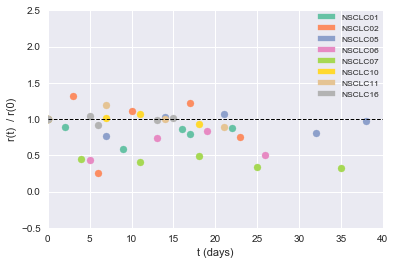

In [49]:
import matplotlib.patches as mpatches
sns.set()
colourlist = sns.color_palette("Set2", 10)
ziplist = [list(i) for i in zip(colourlist,namearray)]
newnamearray = ['NSCLC01','NSCLC02','NSCLC05','NSCLC06','NSCLC07','NSCLC10','NSCLC11','NSCLC16']
patcharray = [mpatches.Patch(color=colourlist[i], label=newnamearray[i]) for i in range(8)]
plt.subplots()
k=0
plt.xlim(0, 40)
plt.ylim(-0.5,2.5)
while k<(len(anarray)):
    #if k==5:
    #    anarray[k][1]=anarray[k][1][:-2]
    plt.scatter(x=np.array(anarray[k][0]),y=np.array(anarray[k][1]),color = colourlist[k])
    #plt.close()
    k+=1
xline = [list(np.linspace(0,40,40)), [1.0 for i in range(40)]]
plt.plot(xline[0], xline[1], linewidth=1, linestyle = '--',c='k')

#plt.title("Change in r during radiotherapy",fontsize="large")
plt.xlabel("t (days)")
plt.ylabel("r(t)  / r(0)")
#plt.title("Plot 1: Showing how relative heights of histogram peaks\n for tumour vs healthy lung change with time for 8 patients", 
#          fontsize=14)
plt.legend(handles=patcharray,loc=1,borderaxespad=0.,fontsize="x-small")
plt.savefig("D:/mphysproject/willsmethodplot.png",format='png',edgecolour='w')
plt.show()
plt.close()

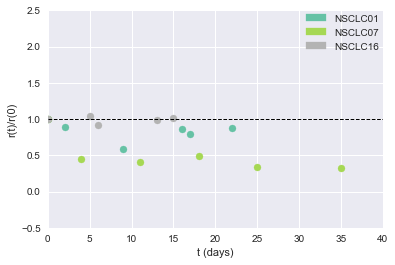

In [47]:
shrinkarray = [0,4,7]
erodearray = [1,2,3,5,6]
sns.set()
colourlist = sns.color_palette("Set2", 10)
ziplist = [list(i) for i in zip(colourlist,namearray)]
patcharray = [mpatches.Patch(color=colourlist[i], label=newnamearray[i]) for i in range(8)]
plt.subplots()
plt.xlim(0, 40)
plt.ylim(-0.5,2.5)
for k in shrinkarray:
    plt.scatter(x=np.array(anarray[k][0]),y=np.array(anarray[k][1]),color = colourlist[k])
xline = [list(np.linspace(0,40,40)), [1.0 for i in range(40)]]
plt.plot(xline[0], xline[1], linewidth=1, linestyle = '--',c='k')
#plt.title("Change in relative height of tumour and healthy peak")
plt.xlabel("t (days)")
plt.ylabel("r(t)  / r(0)")
#plt.title("Plot 1: Showing how relative heights of histogram peaks\n for tumour vs healthy lung change with time for 8 patients", 
#          fontsize=14)
patcharrayshrink = [patcharray[k] for k in shrinkarray]
plt.legend(handles=patcharrayshrink,borderaxespad=0.,loc=1)
plt.savefig("D:/mphysproject/willsmethodplotshrink.png",format='png',edgecolour='w')
plt.show()
plt.close()

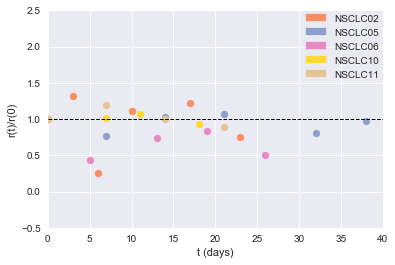

In [48]:
sns.set()
colourlist = sns.color_palette("Set2", 10)
ziplist = [list(i) for i in zip(colourlist,namearray)]
patcharray = [mpatches.Patch(color=colourlist[i], label=newnamearray[i]) for i in range(8)]
plt.subplots()
plt.xlim(0, 40)
plt.ylim(-0.5,2.5)
for k in erodearray:
    plt.scatter(x=np.array(anarray[k][0]),y=np.array(anarray[k][1]),color = colourlist[k])
xline = [list(np.linspace(0,40,40)), [1.0 for i in range(40)]]
plt.plot(xline[0], xline[1], linewidth=1, linestyle = '--',c='k')
#plt.title("Normalised relative height of histogram peaks vs time for suspected non-elastic shrinkage")
plt.xlabel("t (days)")
plt.ylabel("r(t)  / r(0)")
#plt.title("Plot 1: Showing how relative heights of histogram peaks\n for tumour vs healthy lung change with time for 8 patients", 
#          fontsize=14)
patcharrayerode = [patcharray[k] for k in erodearray]
plt.legend(handles=patcharrayerode,loc=1,borderaxespad=0.)
plt.savefig("D:/mphysproject/willsmethodploterode.png",format='png',edgecolour='w')
plt.show()
plt.close()